### Evaluate an ARIMA model using a walk-forward validation

This is a link to the parts of code that I used: <a href="https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/">machinelearningmastery.com</a>

#### Import libraries

In [1]:
#from libraries import *
%run libraries.py

Load previously downloaded data

In [2]:
ts = load_data()
ts.head()

,close
timestamp,
2020-07-13,9200.00
2020-07-14,9116.00
2020-07-15,9156.00
2020-07-16,9044.02
2020-07-17,9087.00


Let's use order from ARIMA_GS with best RMSE

In [3]:
order = (0, 2, 1)

In [4]:
def model(ts, order=(0,0,0)):
    """
    Evaluate ARIMA model with walk-forward validation
    """
    
    # split into train and test sets
    X = ts.close.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()

    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)

    return test, predictions


In [5]:
test, predictions = model(ts, order)

predicted=33293.808540, expected=30969.000000
predicted=31055.589680, expected=32390.000000
predicted=32480.765680, expected=35750.000000
predicted=35850.710928, expected=35900.000000
predicted=36000.845133, expected=34585.900000
predicted=34682.534796, expected=34739.060000
predicted=34835.857745, expected=38720.000000
predicted=38828.340676, expected=39500.000000
predicted=39610.310622, expected=38105.000000
predicted=38210.887536, expected=37334.760000
predicted=37438.099088, expected=35100.000000
predicted=35196.492203, expected=34704.080000
predicted=34799.060088, expected=33312.000000
predicted=33402.605748, expected=31250.510000
predicted=31334.862413, expected=28780.010000
predicted=28856.702333, expected=31711.500000
predicted=31796.744907, expected=32300.000000
predicted=32386.697559, expected=31250.000000
predicted=31333.409723, expected=30120.000000
predicted=30199.831632, expected=31960.000000
predicted=32044.960343, expected=33855.000000
predicted=33945.073758, expected=3

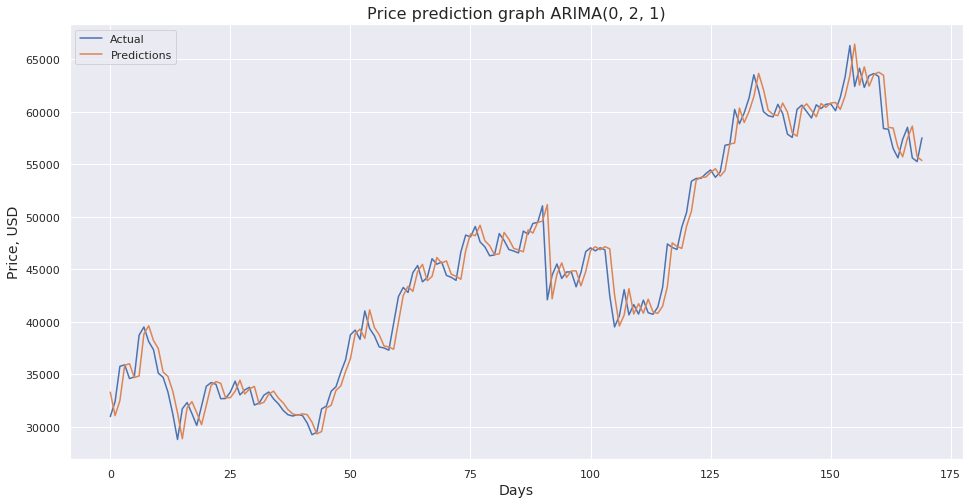

In [6]:
plot_ts([[test, 'Actual'], [predictions, 'Predictions']], 'Price prediction graph ARIMA(0, 2, 1)', 'Days')

#### Even with low RMSE it is clearly seen that predicted line repeats actual values with lag